# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [23]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

1. Посмотреть первые несколько рядов таблицы

In [5]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


2. Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

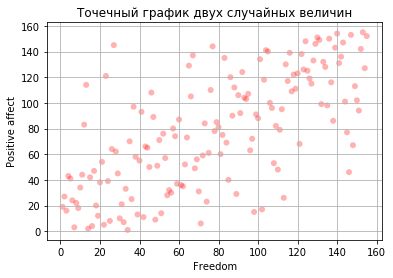

In [25]:
duration = df['Freedom']
votes = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(duration, votes, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Точечный график двух случайных величин')
plt.show()

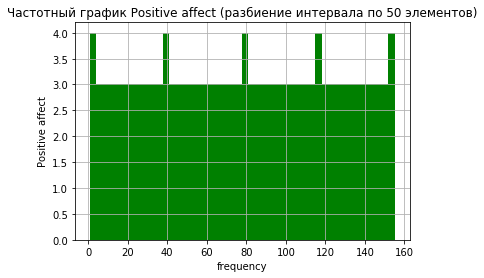

In [5]:
n, bins, patches = plt.hist(df['Positive affect'], 50, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

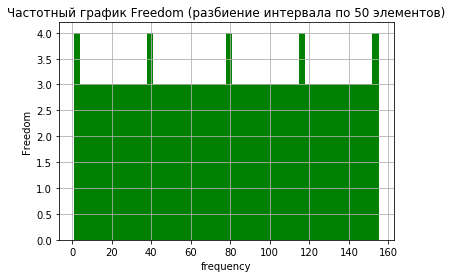

In [26]:
n, bins, patches = plt.hist(df['Freedom'], 50, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

Ответ: равномерное распределние обоих параметров.

3. Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [7]:
print('Медиана: ', statistics.median(df['Freedom']))
# print('Значение моды: ', statistics.mode(df['Freedom']))
print('Значение мат ожидания: ', statistics.mean(df['Freedom']))
print('Значение стандартного отклонения: ' , statistics.pstdev(df['Freedom']))
print('Значение дисперсии: ' , statistics.pvariance(df['Freedom']))
print('Значение минимум: ' , min(df['Freedom']))
print('Значение максимум: ' , max(df['Freedom']))
print('Значение размаха: ' , max(df['Freedom']) - min(df['Freedom']))

Медиана:  71.0
Значение мат ожидания:  nan
Значение стандартного отклонения:  nan
Значение дисперсии:  nan
Значение минимум:  1.0
Значение максимум:  155.0
Значение размаха:  154.0


Есть не заполненые данные

In [8]:
df[df['Freedom'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [9]:
df_fin = df.dropna(axis='index', how='any', subset=['Freedom'])

In [10]:
df_fin[df_fin['Freedom'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy


Теперь все считается

In [11]:
print('Значение мат ожидания: ', statistics.mean(df_fin['Freedom']))
print('Значение стандартного отклонения: ' , statistics.pstdev(df_fin['Freedom']))
print('Значение дисперсии: ' , statistics.pvariance(df_fin['Freedom']))

Значение мат ожидания:  78.0
Значение стандартного отклонения:  44.74371464239419
Значение дисперсии:  2002.0


4. Почему нельзя найти моду?

In [43]:
print('Значение моды: ', statistics.mode(df['Freedom']))

Ответ: Все значения разные.

5. Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

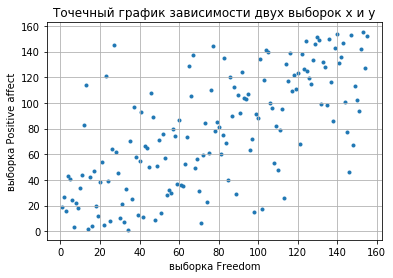

In [12]:
freedom = df['Freedom']
positive_aff = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_aff, marker='.')

Видим: Есть небольшая корреляция

In [13]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df_fin[['Freedom', 'Positive affect']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1
0,0.025974,0.259740
1,0.032468,0.149351
2,0.012987,0.097403
3,0.038961,0.012987
4,0.116883,0.071429


In [14]:
freedom = df_norm[0]
positive_affect = df_norm[1]

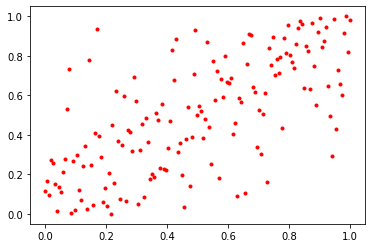

In [15]:
plt.plot(freedom, positive_affect, 'r.')
plt.show()

In [16]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, positive_affect)
print(corr)

0.6817698430601655


Коэф Пирсона тоже показывает положительную корреляцию - но не ярко выраженную

6. Нормализовать данные колонки Freedom (централизация + масштабирование)

In [17]:
print(statistics.mean(freedom))

0.5000000000000001


In [18]:
freedom_n = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_n))

-5.19297866356928e-17


In [19]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_norm= min_max_scaler.fit_transform(np.array(freedom_n).reshape(-1, 1))
print(min(freedom_norm))
print(max(freedom_norm))

[-1.]
[1.]


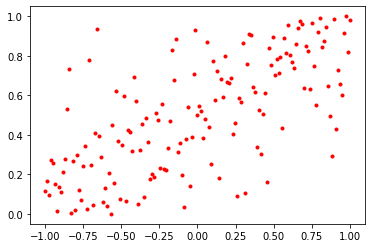

In [20]:
plt.plot(freedom_norm, positive_affect, 'r.')
plt.show()

7. Построить матрицу корреляций для всех колонок таблицы

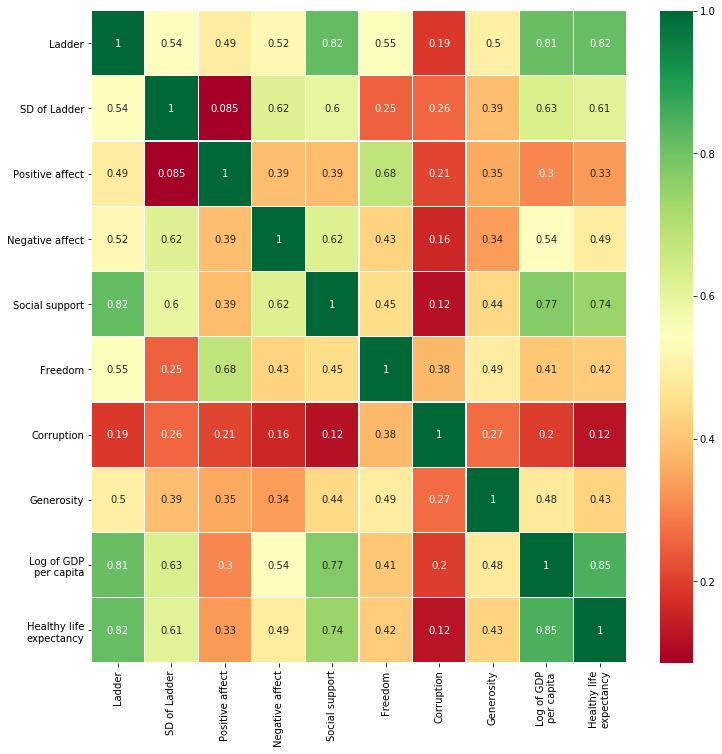

In [21]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


8. Загрузить таблицу цен на авокадо: 

In [27]:
df=pd.read_csv('avocado.txt')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


9. Сделать частотный график колонки AveragePrice. Какое это распределение?

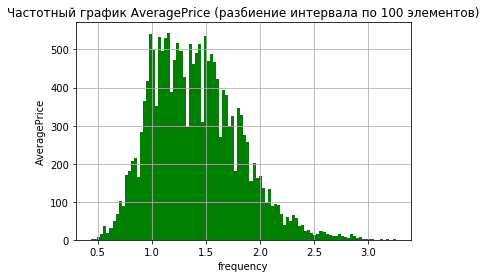

In [29]:
n, bins, patches = plt.hist(df['AveragePrice'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Похоже на распределение Gumbel (Обобщенное распределение экстремальных значений типа I)

10. Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [31]:
np_scaled = min_max_scaler.fit_transform(df[['AveragePrice', '4046']])
df_norm = pd.DataFrame(np_scaled)
AveragePrice = df_norm[0]
A4046 = df_norm[1]
corr, p_value = pearsonr(AveragePrice, A4046)
print(corr)

-0.20831704848788477


In [32]:
np_scaled = min_max_scaler.fit_transform(df[['AveragePrice', '4225']])
df_norm = pd.DataFrame(np_scaled)
AveragePrice = df_norm[0]
A4225= df_norm[1]
corr, p_value = pearsonr(AveragePrice, A4225)
print(corr)

-0.1729277725093354


In [33]:
np_scaled = min_max_scaler.fit_transform(df[['AveragePrice', '4770']])
df_norm = pd.DataFrame(np_scaled)
AveragePrice = df_norm[0]
A4770 = df_norm[1]
corr, p_value = pearsonr(AveragePrice, A4770)
print(corr)

-0.1794459839797562


In [34]:
np_scaled = min_max_scaler.fit_transform(df[['4770', '4046']])
df_norm = pd.DataFrame(np_scaled)
A4770 = df_norm[0]
A4046 = df_norm[1]
corr, p_value = pearsonr(A4770, A4046)
print(corr)

0.8333891041719167


In [35]:
np_scaled = min_max_scaler.fit_transform(df[['4225', '4046']])
df_norm = pd.DataFrame(np_scaled)
A4225 = df_norm[0]
A4046 = df_norm[1]
corr, p_value = pearsonr(A4225, A4046)
print(corr)

0.9261099558992295


In [36]:
np_scaled = min_max_scaler.fit_transform(df[['4225', '4770']])
df_norm = pd.DataFrame(np_scaled)
A4225 = df_norm[0]
A4770 = df_norm[1]
corr, p_value = pearsonr(A4225, A4770)
print(corr)

0.8878549976059534


Есть прямая кореляция  между количеством проданных авокадо по типам. Скорее всего все три колонки коррелируют с каким-то другим параметром, который влияет на все типы авокадо (например день недели). Со средней ценой количество авокадо любого типа коррелируют незначительно - знак отрицательный, чем ниже цена, тем больше авокадо продается - но не сильно влияет.